## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  35.730761  1356.834582  0.977087   5.008729  1.666938
1  74.317570  1240.515273  0.703892   5.125902  1.531833
2  77.596321  1277.338206  0.425101   4.533707  1.551892
3  84.281384  1377.911525  0.595254   4.614523  1.391332
4  67.910671  1427.437845  0.408673  10.286826  1.570204


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.28171 | train_mse: 6.00258 | train_mae: 1.81871 |  0:00:00s
epoch 1  | loss: 1.31378 | train_mse: 4.35228 | train_mae: 1.5964  |  0:00:00s
epoch 2  | loss: 1.03532 | train_mse: 3.35299 | train_mae: 1.40883 |  0:00:00s


epoch 3  | loss: 0.90542 | train_mse: 2.6123  | train_mae: 1.23809 |  0:00:00s
epoch 4  | loss: 0.68717 | train_mse: 2.17531 | train_mae: 1.13787 |  0:00:00s


epoch 5  | loss: 0.7211  | train_mse: 1.86598 | train_mae: 1.05786 |  0:00:00s
epoch 6  | loss: 0.89911 | train_mse: 1.63944 | train_mae: 1.01293 |  0:00:00s


epoch 7  | loss: 0.71004 | train_mse: 1.43232 | train_mae: 0.94534 |  0:00:01s
epoch 8  | loss: 0.72736 | train_mse: 1.29978 | train_mae: 0.90037 |  0:00:01s
epoch 9  | loss: 0.65633 | train_mse: 1.30891 | train_mae: 0.89722 |  0:00:01s


epoch 10 | loss: 0.77736 | train_mse: 1.14694 | train_mae: 0.85386 |  0:00:01s
epoch 11 | loss: 0.56492 | train_mse: 1.05801 | train_mae: 0.8192  |  0:00:01s
epoch 12 | loss: 0.68588 | train_mse: 1.00216 | train_mae: 0.79684 |  0:00:01s


epoch 13 | loss: 0.53948 | train_mse: 0.95496 | train_mae: 0.77662 |  0:00:01s
epoch 14 | loss: 0.58491 | train_mse: 0.91031 | train_mae: 0.75215 |  0:00:01s


epoch 15 | loss: 0.62818 | train_mse: 0.88163 | train_mae: 0.73141 |  0:00:01s
epoch 16 | loss: 0.54752 | train_mse: 0.84601 | train_mae: 0.70519 |  0:00:01s
epoch 17 | loss: 0.53976 | train_mse: 0.80691 | train_mae: 0.67526 |  0:00:01s


epoch 18 | loss: 0.71667 | train_mse: 0.78372 | train_mae: 0.66013 |  0:00:02s
epoch 19 | loss: 0.67896 | train_mse: 0.74157 | train_mae: 0.63645 |  0:00:02s
epoch 20 | loss: 0.52676 | train_mse: 0.71182 | train_mae: 0.61922 |  0:00:02s


epoch 21 | loss: 0.55782 | train_mse: 0.67599 | train_mae: 0.60295 |  0:00:02s
epoch 22 | loss: 0.47472 | train_mse: 0.64857 | train_mae: 0.58755 |  0:00:02s
epoch 23 | loss: 0.47163 | train_mse: 0.62015 | train_mae: 0.57256 |  0:00:02s


epoch 24 | loss: 0.52017 | train_mse: 0.59168 | train_mae: 0.55868 |  0:00:02s
epoch 25 | loss: 0.5187  | train_mse: 0.57023 | train_mae: 0.54563 |  0:00:02s


epoch 26 | loss: 0.40356 | train_mse: 0.55538 | train_mae: 0.53824 |  0:00:02s
epoch 27 | loss: 0.47694 | train_mse: 0.53168 | train_mae: 0.52582 |  0:00:02s
epoch 28 | loss: 0.38639 | train_mse: 0.51459 | train_mae: 0.5171  |  0:00:03s


epoch 29 | loss: 0.41606 | train_mse: 0.49476 | train_mae: 0.50814 |  0:00:03s
epoch 30 | loss: 0.5301  | train_mse: 0.48223 | train_mae: 0.50266 |  0:00:03s


epoch 31 | loss: 0.34935 | train_mse: 0.45479 | train_mae: 0.49    |  0:00:03s
epoch 32 | loss: 0.41047 | train_mse: 0.41639 | train_mae: 0.47439 |  0:00:03s


epoch 33 | loss: 0.44439 | train_mse: 0.38224 | train_mae: 0.4604  |  0:00:03s
epoch 34 | loss: 0.41595 | train_mse: 0.35637 | train_mae: 0.44747 |  0:00:03s


epoch 35 | loss: 0.28454 | train_mse: 0.33718 | train_mae: 0.43634 |  0:00:03s
epoch 36 | loss: 0.39783 | train_mse: 0.32287 | train_mae: 0.42646 |  0:00:03s
epoch 37 | loss: 0.37256 | train_mse: 0.30832 | train_mae: 0.41629 |  0:00:03s


epoch 38 | loss: 0.34478 | train_mse: 0.29181 | train_mae: 0.40659 |  0:00:04s
epoch 39 | loss: 0.31136 | train_mse: 0.28423 | train_mae: 0.4008  |  0:00:04s
epoch 40 | loss: 0.40858 | train_mse: 0.27481 | train_mae: 0.3931  |  0:00:04s


epoch 41 | loss: 0.37761 | train_mse: 0.27236 | train_mae: 0.39137 |  0:00:04s
epoch 42 | loss: 0.34713 | train_mse: 0.26551 | train_mae: 0.38744 |  0:00:04s
epoch 43 | loss: 0.36636 | train_mse: 0.26177 | train_mae: 0.3846  |  0:00:04s


epoch 44 | loss: 0.3192  | train_mse: 0.26186 | train_mae: 0.38575 |  0:00:04s
epoch 45 | loss: 0.34846 | train_mse: 0.25903 | train_mae: 0.38614 |  0:00:04s


epoch 46 | loss: 0.51092 | train_mse: 0.25517 | train_mae: 0.38446 |  0:00:04s
epoch 47 | loss: 0.34622 | train_mse: 0.25124 | train_mae: 0.3828  |  0:00:04s
epoch 48 | loss: 0.35372 | train_mse: 0.25038 | train_mae: 0.38313 |  0:00:05s


epoch 49 | loss: 0.31401 | train_mse: 0.24111 | train_mae: 0.37488 |  0:00:05s
epoch 50 | loss: 0.32225 | train_mse: 0.23913 | train_mae: 0.37276 |  0:00:05s
epoch 51 | loss: 0.27144 | train_mse: 0.23424 | train_mae: 0.37177 |  0:00:05s


epoch 52 | loss: 0.38268 | train_mse: 0.22899 | train_mae: 0.36778 |  0:00:05s
epoch 53 | loss: 0.27237 | train_mse: 0.22493 | train_mae: 0.36521 |  0:00:05s
epoch 54 | loss: 0.21881 | train_mse: 0.22187 | train_mae: 0.36243 |  0:00:05s


epoch 55 | loss: 0.42177 | train_mse: 0.22535 | train_mae: 0.36474 |  0:00:05s
epoch 56 | loss: 0.25319 | train_mse: 0.2197  | train_mae: 0.35874 |  0:00:05s


epoch 57 | loss: 0.19851 | train_mse: 0.21934 | train_mae: 0.35748 |  0:00:06s
epoch 58 | loss: 0.26846 | train_mse: 0.21828 | train_mae: 0.35576 |  0:00:06s


epoch 59 | loss: 0.27925 | train_mse: 0.21719 | train_mae: 0.35268 |  0:00:06s
epoch 60 | loss: 0.36149 | train_mse: 0.21172 | train_mae: 0.34858 |  0:00:06s
epoch 61 | loss: 0.29249 | train_mse: 0.20772 | train_mae: 0.34602 |  0:00:06s


epoch 62 | loss: 0.35395 | train_mse: 0.20672 | train_mae: 0.34489 |  0:00:06s
epoch 63 | loss: 0.30381 | train_mse: 0.20218 | train_mae: 0.34227 |  0:00:06s


epoch 64 | loss: 0.32728 | train_mse: 0.19806 | train_mae: 0.33705 |  0:00:06s
epoch 65 | loss: 0.29652 | train_mse: 0.19769 | train_mae: 0.33752 |  0:00:06s


epoch 66 | loss: 0.41824 | train_mse: 0.1907  | train_mae: 0.33279 |  0:00:06s
epoch 67 | loss: 0.26341 | train_mse: 0.18899 | train_mae: 0.33499 |  0:00:07s
epoch 68 | loss: 0.30315 | train_mse: 0.1864  | train_mae: 0.33685 |  0:00:07s


epoch 69 | loss: 0.33564 | train_mse: 0.18677 | train_mae: 0.3413  |  0:00:07s
epoch 70 | loss: 0.53014 | train_mse: 0.19695 | train_mae: 0.34652 |  0:00:07s
epoch 71 | loss: 0.31258 | train_mse: 0.19875 | train_mae: 0.34269 |  0:00:07s


epoch 72 | loss: 0.29568 | train_mse: 0.1998  | train_mae: 0.34114 |  0:00:07s
epoch 73 | loss: 0.28621 | train_mse: 0.19852 | train_mae: 0.33966 |  0:00:07s


epoch 74 | loss: 0.2944  | train_mse: 0.19592 | train_mae: 0.33844 |  0:00:07s
epoch 75 | loss: 0.23841 | train_mse: 0.1878  | train_mae: 0.3336  |  0:00:07s
epoch 76 | loss: 0.31332 | train_mse: 0.18305 | train_mae: 0.32926 |  0:00:07s


epoch 77 | loss: 0.45216 | train_mse: 0.1758  | train_mae: 0.32303 |  0:00:08s
epoch 78 | loss: 0.30506 | train_mse: 0.17152 | train_mae: 0.32261 |  0:00:08s
epoch 79 | loss: 0.14149 | train_mse: 0.16504 | train_mae: 0.31894 |  0:00:08s


epoch 80 | loss: 0.26856 | train_mse: 0.16056 | train_mae: 0.31858 |  0:00:08s
epoch 81 | loss: 0.31858 | train_mse: 0.15662 | train_mae: 0.31534 |  0:00:08s
epoch 82 | loss: 0.24129 | train_mse: 0.1518  | train_mae: 0.30939 |  0:00:08s


epoch 83 | loss: 0.29907 | train_mse: 0.14583 | train_mae: 0.30298 |  0:00:08s
epoch 84 | loss: 0.18904 | train_mse: 0.14208 | train_mae: 0.29801 |  0:00:08s


epoch 85 | loss: 0.27065 | train_mse: 0.14068 | train_mae: 0.2981  |  0:00:08s
epoch 86 | loss: 0.21325 | train_mse: 0.13862 | train_mae: 0.29893 |  0:00:08s
epoch 87 | loss: 0.19717 | train_mse: 0.13609 | train_mae: 0.2989  |  0:00:08s


epoch 88 | loss: 0.209   | train_mse: 0.13269 | train_mae: 0.29566 |  0:00:09s
epoch 89 | loss: 0.21055 | train_mse: 0.13016 | train_mae: 0.29324 |  0:00:09s
epoch 90 | loss: 0.37296 | train_mse: 0.12637 | train_mae: 0.28949 |  0:00:09s


epoch 91 | loss: 0.21794 | train_mse: 0.12504 | train_mae: 0.28828 |  0:00:09s
epoch 92 | loss: 0.25296 | train_mse: 0.12417 | train_mae: 0.28703 |  0:00:09s
epoch 93 | loss: 0.12733 | train_mse: 0.12325 | train_mae: 0.28805 |  0:00:09s


epoch 94 | loss: 0.18521 | train_mse: 0.12063 | train_mae: 0.28308 |  0:00:09s
epoch 95 | loss: 0.44282 | train_mse: 0.11893 | train_mae: 0.27986 |  0:00:09s


epoch 96 | loss: 0.21823 | train_mse: 0.11538 | train_mae: 0.27436 |  0:00:09s
epoch 97 | loss: 0.26585 | train_mse: 0.11166 | train_mae: 0.26831 |  0:00:09s
epoch 98 | loss: 0.19618 | train_mse: 0.11112 | train_mae: 0.26656 |  0:00:10s


epoch 99 | loss: 0.15111 | train_mse: 0.11063 | train_mae: 0.26651 |  0:00:10s
epoch 100| loss: 0.16266 | train_mse: 0.11114 | train_mae: 0.26764 |  0:00:10s
epoch 101| loss: 0.21582 | train_mse: 0.11241 | train_mae: 0.26874 |  0:00:10s


epoch 102| loss: 0.2142  | train_mse: 0.11455 | train_mae: 0.27471 |  0:00:10s
epoch 103| loss: 0.18898 | train_mse: 0.11549 | train_mae: 0.27839 |  0:00:10s
epoch 104| loss: 0.24583 | train_mse: 0.1166  | train_mae: 0.28059 |  0:00:10s


epoch 105| loss: 0.20025 | train_mse: 0.11714 | train_mae: 0.28161 |  0:00:10s
epoch 106| loss: 0.17948 | train_mse: 0.11463 | train_mae: 0.27671 |  0:00:10s
epoch 107| loss: 0.24297 | train_mse: 0.11148 | train_mae: 0.27184 |  0:00:10s


epoch 108| loss: 0.17469 | train_mse: 0.10827 | train_mae: 0.26742 |  0:00:10s
epoch 109| loss: 0.21369 | train_mse: 0.106   | train_mae: 0.26467 |  0:00:11s
epoch 110| loss: 0.17949 | train_mse: 0.10571 | train_mae: 0.26315 |  0:00:11s


epoch 111| loss: 0.1672  | train_mse: 0.10443 | train_mae: 0.25968 |  0:00:11s
epoch 112| loss: 0.172   | train_mse: 0.10459 | train_mae: 0.25773 |  0:00:11s
epoch 113| loss: 0.16529 | train_mse: 0.10278 | train_mae: 0.25541 |  0:00:11s


epoch 114| loss: 0.20723 | train_mse: 0.10169 | train_mae: 0.25272 |  0:00:11s
epoch 115| loss: 0.15949 | train_mse: 0.10162 | train_mae: 0.2497  |  0:00:11s


epoch 116| loss: 0.12747 | train_mse: 0.10073 | train_mae: 0.24957 |  0:00:11s
epoch 117| loss: 0.21906 | train_mse: 0.09962 | train_mae: 0.24764 |  0:00:11s
epoch 118| loss: 0.20275 | train_mse: 0.09976 | train_mae: 0.24844 |  0:00:11s


epoch 119| loss: 0.26522 | train_mse: 0.09951 | train_mae: 0.24728 |  0:00:12s
epoch 120| loss: 0.23167 | train_mse: 0.1002  | train_mae: 0.24934 |  0:00:12s
epoch 121| loss: 0.25424 | train_mse: 0.09846 | train_mae: 0.24713 |  0:00:12s


epoch 122| loss: 0.18933 | train_mse: 0.09543 | train_mae: 0.24365 |  0:00:12s
epoch 123| loss: 0.16646 | train_mse: 0.08974 | train_mae: 0.2376  |  0:00:12s
epoch 124| loss: 0.22891 | train_mse: 0.08899 | train_mae: 0.2374  |  0:00:12s


epoch 125| loss: 0.16166 | train_mse: 0.0873  | train_mae: 0.23423 |  0:00:12s
epoch 126| loss: 0.17998 | train_mse: 0.08699 | train_mae: 0.23506 |  0:00:12s


epoch 127| loss: 0.40183 | train_mse: 0.08799 | train_mae: 0.23712 |  0:00:12s
epoch 128| loss: 0.14189 | train_mse: 0.08638 | train_mae: 0.23532 |  0:00:12s
epoch 129| loss: 0.28858 | train_mse: 0.08666 | train_mae: 0.2362  |  0:00:12s


epoch 130| loss: 0.18778 | train_mse: 0.08466 | train_mae: 0.23631 |  0:00:13s
epoch 131| loss: 0.19947 | train_mse: 0.08161 | train_mae: 0.22987 |  0:00:13s
epoch 132| loss: 0.12972 | train_mse: 0.07982 | train_mae: 0.22503 |  0:00:13s


epoch 133| loss: 0.21675 | train_mse: 0.0784  | train_mae: 0.2232  |  0:00:13s
epoch 134| loss: 0.13283 | train_mse: 0.07814 | train_mae: 0.22078 |  0:00:13s
epoch 135| loss: 0.22724 | train_mse: 0.07854 | train_mae: 0.21997 |  0:00:13s


epoch 136| loss: 0.29058 | train_mse: 0.08134 | train_mae: 0.22295 |  0:00:13s
epoch 137| loss: 0.28532 | train_mse: 0.08132 | train_mae: 0.22316 |  0:00:13s
epoch 138| loss: 0.32026 | train_mse: 0.08299 | train_mae: 0.22584 |  0:00:13s


epoch 139| loss: 0.38981 | train_mse: 0.08129 | train_mae: 0.22539 |  0:00:13s


epoch 140| loss: 0.32448 | train_mse: 0.08009 | train_mae: 0.22376 |  0:00:14s
epoch 141| loss: 0.18659 | train_mse: 0.08121 | train_mae: 0.22758 |  0:00:14s
epoch 142| loss: 0.14925 | train_mse: 0.0803  | train_mae: 0.22865 |  0:00:14s


epoch 143| loss: 0.23276 | train_mse: 0.0782  | train_mae: 0.22695 |  0:00:14s
epoch 144| loss: 0.14089 | train_mse: 0.0771  | train_mae: 0.22716 |  0:00:14s


epoch 145| loss: 0.19351 | train_mse: 0.07495 | train_mae: 0.22437 |  0:00:14s
epoch 146| loss: 0.17027 | train_mse: 0.07309 | train_mae: 0.22158 |  0:00:14s
epoch 147| loss: 0.28555 | train_mse: 0.0741  | train_mae: 0.22053 |  0:00:15s


epoch 148| loss: 0.17736 | train_mse: 0.07608 | train_mae: 0.22368 |  0:00:15s
epoch 149| loss: 0.2112  | train_mse: 0.0784  | train_mae: 0.2247  |  0:00:15s


epoch 150| loss: 0.16832 | train_mse: 0.08171 | train_mae: 0.22524 |  0:00:15s
epoch 151| loss: 0.1377  | train_mse: 0.08168 | train_mae: 0.22526 |  0:00:15s
epoch 152| loss: 0.25744 | train_mse: 0.08043 | train_mae: 0.22562 |  0:00:15s


epoch 153| loss: 0.15635 | train_mse: 0.07808 | train_mae: 0.22606 |  0:00:15s
epoch 154| loss: 0.2022  | train_mse: 0.07695 | train_mae: 0.22755 |  0:00:15s


epoch 155| loss: 0.19169 | train_mse: 0.0771  | train_mae: 0.22761 |  0:00:15s
epoch 156| loss: 0.21344 | train_mse: 0.08105 | train_mae: 0.22869 |  0:00:15s
epoch 157| loss: 0.2443  | train_mse: 0.08372 | train_mae: 0.22855 |  0:00:16s


epoch 158| loss: 0.1794  | train_mse: 0.08652 | train_mae: 0.22941 |  0:00:16s
epoch 159| loss: 0.1878  | train_mse: 0.08161 | train_mae: 0.22745 |  0:00:16s
epoch 160| loss: 0.26682 | train_mse: 0.07793 | train_mae: 0.22537 |  0:00:16s


epoch 161| loss: 0.1647  | train_mse: 0.07348 | train_mae: 0.21949 |  0:00:16s
epoch 162| loss: 0.26583 | train_mse: 0.07202 | train_mae: 0.2192  |  0:00:16s
epoch 163| loss: 0.18936 | train_mse: 0.07101 | train_mae: 0.21927 |  0:00:16s


epoch 164| loss: 0.215   | train_mse: 0.06994 | train_mae: 0.21767 |  0:00:16s
epoch 165| loss: 0.23409 | train_mse: 0.06878 | train_mae: 0.21641 |  0:00:16s


epoch 166| loss: 0.23018 | train_mse: 0.06753 | train_mae: 0.21314 |  0:00:16s
epoch 167| loss: 0.12867 | train_mse: 0.06768 | train_mae: 0.21187 |  0:00:16s
epoch 168| loss: 0.28094 | train_mse: 0.06804 | train_mae: 0.21073 |  0:00:17s


epoch 169| loss: 0.13385 | train_mse: 0.06931 | train_mae: 0.21277 |  0:00:17s
epoch 170| loss: 0.18072 | train_mse: 0.06839 | train_mae: 0.21137 |  0:00:17s
epoch 171| loss: 0.18858 | train_mse: 0.06877 | train_mae: 0.21103 |  0:00:17s


epoch 172| loss: 0.10481 | train_mse: 0.06706 | train_mae: 0.20917 |  0:00:17s
epoch 173| loss: 0.1899  | train_mse: 0.06418 | train_mae: 0.20504 |  0:00:17s
epoch 174| loss: 0.1405  | train_mse: 0.06368 | train_mae: 0.2065  |  0:00:17s


epoch 175| loss: 0.18698 | train_mse: 0.06414 | train_mae: 0.20633 |  0:00:17s


epoch 176| loss: 0.14294 | train_mse: 0.0649  | train_mae: 0.20809 |  0:00:17s
epoch 177| loss: 0.10382 | train_mse: 0.06964 | train_mae: 0.21515 |  0:00:17s
epoch 178| loss: 0.1532  | train_mse: 0.07385 | train_mae: 0.21944 |  0:00:18s


epoch 179| loss: 0.11816 | train_mse: 0.07489 | train_mae: 0.21959 |  0:00:18s
epoch 180| loss: 0.20309 | train_mse: 0.07405 | train_mae: 0.21879 |  0:00:18s
epoch 181| loss: 0.15663 | train_mse: 0.07266 | train_mae: 0.21557 |  0:00:18s


epoch 182| loss: 0.16926 | train_mse: 0.07289 | train_mae: 0.2137  |  0:00:18s
epoch 183| loss: 0.17664 | train_mse: 0.07149 | train_mae: 0.21096 |  0:00:18s
epoch 184| loss: 0.18786 | train_mse: 0.06911 | train_mae: 0.20914 |  0:00:18s


epoch 185| loss: 0.15153 | train_mse: 0.06792 | train_mae: 0.20825 |  0:00:18s
epoch 186| loss: 0.25742 | train_mse: 0.06686 | train_mae: 0.20685 |  0:00:18s


epoch 187| loss: 0.13059 | train_mse: 0.06776 | train_mae: 0.20763 |  0:00:18s
epoch 188| loss: 0.30812 | train_mse: 0.06937 | train_mae: 0.20956 |  0:00:19s
epoch 189| loss: 0.14867 | train_mse: 0.0685  | train_mae: 0.20997 |  0:00:19s


epoch 190| loss: 0.3015  | train_mse: 0.0667  | train_mae: 0.20794 |  0:00:19s
epoch 191| loss: 0.17132 | train_mse: 0.06723 | train_mae: 0.20926 |  0:00:19s


epoch 192| loss: 0.17638 | train_mse: 0.06814 | train_mae: 0.20865 |  0:00:19s
epoch 193| loss: 0.18554 | train_mse: 0.06703 | train_mae: 0.2046  |  0:00:19s
epoch 194| loss: 0.12157 | train_mse: 0.06528 | train_mae: 0.20276 |  0:00:19s


epoch 195| loss: 0.21294 | train_mse: 0.06257 | train_mae: 0.19883 |  0:00:19s
epoch 196| loss: 0.16313 | train_mse: 0.06104 | train_mae: 0.19764 |  0:00:19s
epoch 197| loss: 0.23265 | train_mse: 0.05972 | train_mae: 0.19526 |  0:00:19s


epoch 198| loss: 0.16673 | train_mse: 0.05903 | train_mae: 0.19412 |  0:00:20s
epoch 199| loss: 0.10896 | train_mse: 0.05802 | train_mae: 0.19111 |  0:00:20s
epoch 200| loss: 0.16133 | train_mse: 0.05748 | train_mae: 0.18794 |  0:00:20s


epoch 201| loss: 0.13104 | train_mse: 0.0578  | train_mae: 0.1882  |  0:00:20s
epoch 202| loss: 0.12852 | train_mse: 0.05766 | train_mae: 0.18677 |  0:00:20s
epoch 203| loss: 0.21668 | train_mse: 0.05812 | train_mae: 0.18865 |  0:00:20s


epoch 204| loss: 0.21997 | train_mse: 0.0579  | train_mae: 0.18827 |  0:00:20s
epoch 205| loss: 0.14692 | train_mse: 0.05907 | train_mae: 0.19132 |  0:00:20s


epoch 206| loss: 0.27269 | train_mse: 0.05913 | train_mae: 0.1921  |  0:00:20s
epoch 207| loss: 0.14393 | train_mse: 0.06106 | train_mae: 0.19394 |  0:00:20s
epoch 208| loss: 0.30851 | train_mse: 0.06659 | train_mae: 0.19636 |  0:00:20s


epoch 209| loss: 0.11476 | train_mse: 0.06543 | train_mae: 0.19618 |  0:00:21s
epoch 210| loss: 0.11427 | train_mse: 0.06556 | train_mae: 0.19678 |  0:00:21s
epoch 211| loss: 0.18155 | train_mse: 0.06553 | train_mae: 0.19808 |  0:00:21s


epoch 212| loss: 0.2122  | train_mse: 0.06859 | train_mae: 0.20319 |  0:00:21s
epoch 213| loss: 0.13294 | train_mse: 0.0636  | train_mae: 0.2012  |  0:00:21s
epoch 214| loss: 0.22874 | train_mse: 0.06208 | train_mae: 0.19861 |  0:00:21s


epoch 215| loss: 0.09726 | train_mse: 0.06215 | train_mae: 0.19713 |  0:00:21s
epoch 216| loss: 0.15367 | train_mse: 0.06419 | train_mae: 0.19693 |  0:00:21s


epoch 217| loss: 0.09548 | train_mse: 0.06495 | train_mae: 0.19718 |  0:00:21s
epoch 218| loss: 0.16186 | train_mse: 0.06271 | train_mae: 0.1948  |  0:00:21s
epoch 219| loss: 0.09446 | train_mse: 0.05944 | train_mae: 0.19    |  0:00:21s


epoch 220| loss: 0.1957  | train_mse: 0.05497 | train_mae: 0.18517 |  0:00:22s
epoch 221| loss: 0.2743  | train_mse: 0.0545  | train_mae: 0.1859  |  0:00:22s


epoch 222| loss: 0.23045 | train_mse: 0.05563 | train_mae: 0.1876  |  0:00:22s
epoch 223| loss: 0.12368 | train_mse: 0.05827 | train_mae: 0.19134 |  0:00:22s
epoch 224| loss: 0.12911 | train_mse: 0.06054 | train_mae: 0.19337 |  0:00:22s


epoch 225| loss: 0.16893 | train_mse: 0.06182 | train_mae: 0.1974  |  0:00:22s
epoch 226| loss: 0.17223 | train_mse: 0.06037 | train_mae: 0.1987  |  0:00:22s
epoch 227| loss: 0.13871 | train_mse: 0.05938 | train_mae: 0.19731 |  0:00:22s


epoch 228| loss: 0.09397 | train_mse: 0.05865 | train_mae: 0.19725 |  0:00:22s
epoch 229| loss: 0.16437 | train_mse: 0.05873 | train_mae: 0.19566 |  0:00:22s
epoch 230| loss: 0.17336 | train_mse: 0.05988 | train_mae: 0.19612 |  0:00:23s


epoch 231| loss: 0.11249 | train_mse: 0.05927 | train_mae: 0.19311 |  0:00:23s
epoch 232| loss: 0.21735 | train_mse: 0.05764 | train_mae: 0.18837 |  0:00:23s
epoch 233| loss: 0.20911 | train_mse: 0.05701 | train_mae: 0.18529 |  0:00:23s


epoch 234| loss: 0.12039 | train_mse: 0.05625 | train_mae: 0.18364 |  0:00:23s
epoch 235| loss: 0.12279 | train_mse: 0.05787 | train_mae: 0.18659 |  0:00:23s
epoch 236| loss: 0.32776 | train_mse: 0.05859 | train_mae: 0.18751 |  0:00:23s


epoch 237| loss: 0.09603 | train_mse: 0.06023 | train_mae: 0.18954 |  0:00:23s
epoch 238| loss: 0.10257 | train_mse: 0.0592  | train_mae: 0.18949 |  0:00:23s


epoch 239| loss: 0.10372 | train_mse: 0.05933 | train_mae: 0.19417 |  0:00:23s
epoch 240| loss: 0.13102 | train_mse: 0.05984 | train_mae: 0.19563 |  0:00:23s
epoch 241| loss: 0.08903 | train_mse: 0.063   | train_mae: 0.19949 |  0:00:24s


epoch 242| loss: 0.15759 | train_mse: 0.06306 | train_mae: 0.19848 |  0:00:24s
epoch 243| loss: 0.11369 | train_mse: 0.06345 | train_mae: 0.199   |  0:00:24s
epoch 244| loss: 0.15453 | train_mse: 0.0616  | train_mae: 0.19516 |  0:00:24s


epoch 245| loss: 0.08069 | train_mse: 0.05727 | train_mae: 0.18835 |  0:00:24s
epoch 246| loss: 0.13346 | train_mse: 0.05534 | train_mae: 0.18433 |  0:00:24s
epoch 247| loss: 0.18393 | train_mse: 0.05371 | train_mae: 0.1819  |  0:00:24s


epoch 248| loss: 0.08162 | train_mse: 0.05147 | train_mae: 0.17985 |  0:00:24s
epoch 249| loss: 0.07802 | train_mse: 0.05018 | train_mae: 0.17768 |  0:00:24s


epoch 250| loss: 0.09626 | train_mse: 0.04707 | train_mae: 0.17145 |  0:00:24s
epoch 251| loss: 0.10073 | train_mse: 0.04365 | train_mae: 0.16582 |  0:00:25s
epoch 252| loss: 0.19078 | train_mse: 0.04209 | train_mae: 0.16329 |  0:00:25s


epoch 253| loss: 0.15777 | train_mse: 0.04182 | train_mae: 0.16328 |  0:00:25s
epoch 254| loss: 0.23435 | train_mse: 0.04087 | train_mae: 0.15939 |  0:00:25s
epoch 255| loss: 0.16499 | train_mse: 0.04273 | train_mae: 0.1597  |  0:00:25s


epoch 256| loss: 0.14238 | train_mse: 0.04316 | train_mae: 0.16046 |  0:00:25s
epoch 257| loss: 0.18374 | train_mse: 0.04376 | train_mae: 0.16284 |  0:00:25s
epoch 258| loss: 0.1643  | train_mse: 0.0445  | train_mae: 0.16545 |  0:00:25s


epoch 259| loss: 0.1508  | train_mse: 0.04588 | train_mae: 0.16651 |  0:00:25s
epoch 260| loss: 0.24315 | train_mse: 0.04778 | train_mae: 0.16864 |  0:00:25s
epoch 261| loss: 0.11714 | train_mse: 0.04958 | train_mae: 0.17124 |  0:00:25s


epoch 262| loss: 0.11003 | train_mse: 0.05218 | train_mae: 0.17336 |  0:00:26s
epoch 263| loss: 0.26262 | train_mse: 0.05104 | train_mae: 0.17202 |  0:00:26s
epoch 264| loss: 0.21081 | train_mse: 0.0493  | train_mae: 0.17232 |  0:00:26s


epoch 265| loss: 0.15778 | train_mse: 0.04987 | train_mae: 0.17471 |  0:00:26s
epoch 266| loss: 0.09755 | train_mse: 0.05002 | train_mae: 0.17803 |  0:00:26s
epoch 267| loss: 0.22139 | train_mse: 0.05171 | train_mae: 0.18161 |  0:00:26s


epoch 268| loss: 0.07373 | train_mse: 0.05238 | train_mae: 0.18358 |  0:00:26s
epoch 269| loss: 0.2032  | train_mse: 0.05291 | train_mae: 0.18696 |  0:00:26s
epoch 270| loss: 0.11153 | train_mse: 0.0529  | train_mae: 0.18802 |  0:00:26s


epoch 271| loss: 0.11472 | train_mse: 0.05115 | train_mae: 0.18493 |  0:00:26s
epoch 272| loss: 0.08273 | train_mse: 0.05014 | train_mae: 0.18121 |  0:00:27s


epoch 273| loss: 0.12626 | train_mse: 0.04961 | train_mae: 0.17727 |  0:00:27s
epoch 274| loss: 0.17792 | train_mse: 0.05045 | train_mae: 0.17672 |  0:00:27s
epoch 275| loss: 0.2267  | train_mse: 0.0501  | train_mae: 0.17653 |  0:00:27s


epoch 276| loss: 0.17795 | train_mse: 0.04878 | train_mae: 0.17496 |  0:00:27s
epoch 277| loss: 0.14994 | train_mse: 0.04781 | train_mae: 0.17297 |  0:00:27s
epoch 278| loss: 0.13831 | train_mse: 0.04626 | train_mae: 0.16588 |  0:00:27s


epoch 279| loss: 0.09514 | train_mse: 0.0457  | train_mae: 0.16403 |  0:00:27s
epoch 280| loss: 0.12523 | train_mse: 0.04544 | train_mae: 0.16484 |  0:00:27s


epoch 281| loss: 0.18758 | train_mse: 0.04604 | train_mae: 0.16408 |  0:00:27s
epoch 282| loss: 0.21463 | train_mse: 0.04751 | train_mae: 0.16516 |  0:00:27s
epoch 283| loss: 0.07923 | train_mse: 0.04899 | train_mae: 0.16676 |  0:00:28s


epoch 284| loss: 0.1874  | train_mse: 0.05131 | train_mae: 0.17151 |  0:00:28s
epoch 285| loss: 0.19761 | train_mse: 0.05316 | train_mae: 0.17391 |  0:00:28s
epoch 286| loss: 0.11921 | train_mse: 0.053   | train_mae: 0.17318 |  0:00:28s


epoch 287| loss: 0.14392 | train_mse: 0.05247 | train_mae: 0.17204 |  0:00:28s
epoch 288| loss: 0.11919 | train_mse: 0.05178 | train_mae: 0.17263 |  0:00:28s
epoch 289| loss: 0.13296 | train_mse: 0.05318 | train_mae: 0.17367 |  0:00:28s


epoch 290| loss: 0.10675 | train_mse: 0.05642 | train_mae: 0.17867 |  0:00:28s
epoch 291| loss: 0.10851 | train_mse: 0.05768 | train_mae: 0.18222 |  0:00:28s


epoch 292| loss: 0.09901 | train_mse: 0.05698 | train_mae: 0.18212 |  0:00:28s
epoch 293| loss: 0.12229 | train_mse: 0.05369 | train_mae: 0.17843 |  0:00:28s
epoch 294| loss: 0.14169 | train_mse: 0.04937 | train_mae: 0.17318 |  0:00:29s


epoch 295| loss: 0.09294 | train_mse: 0.04862 | train_mae: 0.16944 |  0:00:29s
epoch 296| loss: 0.20674 | train_mse: 0.04553 | train_mae: 0.16547 |  0:00:29s
epoch 297| loss: 0.12843 | train_mse: 0.04498 | train_mae: 0.16412 |  0:00:29s


epoch 298| loss: 0.158   | train_mse: 0.04387 | train_mae: 0.16237 |  0:00:29s
epoch 299| loss: 0.08855 | train_mse: 0.04348 | train_mae: 0.16224 |  0:00:29s
epoch 300| loss: 0.15825 | train_mse: 0.0432  | train_mae: 0.16181 |  0:00:29s


epoch 301| loss: 0.12725 | train_mse: 0.04407 | train_mae: 0.16286 |  0:00:29s
epoch 302| loss: 0.18878 | train_mse: 0.04515 | train_mae: 0.16352 |  0:00:29s
epoch 303| loss: 0.0819  | train_mse: 0.04758 | train_mae: 0.16578 |  0:00:29s


epoch 304| loss: 0.11886 | train_mse: 0.04917 | train_mae: 0.16703 |  0:00:29s

Early stopping occurred at epoch 304 with best_epoch = 254 and best_train_mae = 0.15939
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3729023264031657


ABC Pre-generator MAE 0.3609532346007588


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

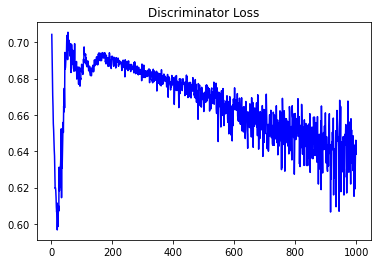

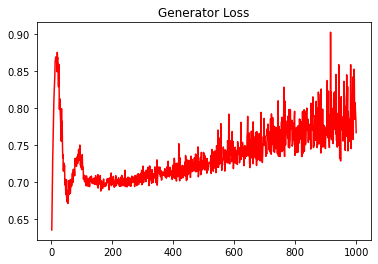

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4992845835033804


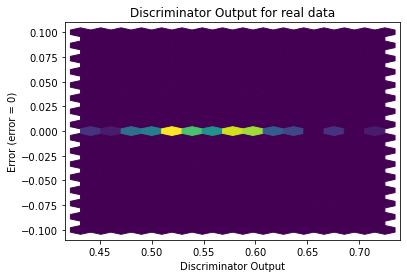

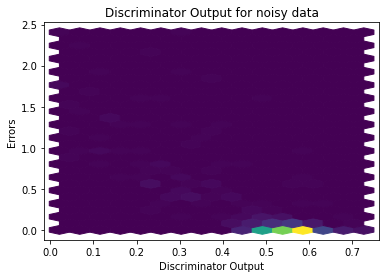

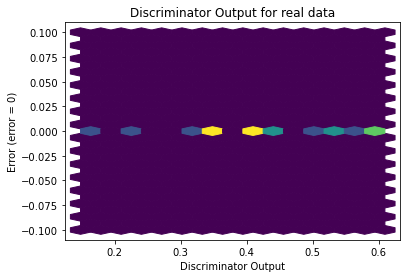

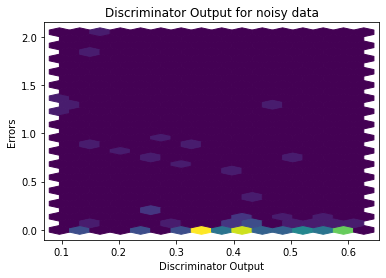

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


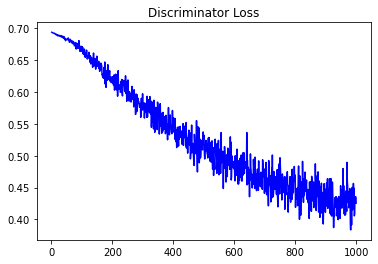

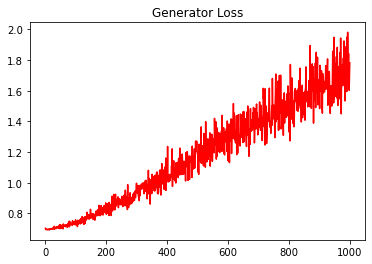

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3784494720879011


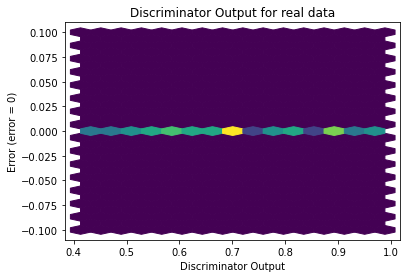

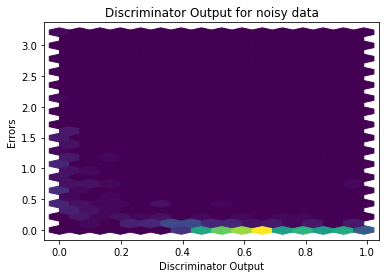

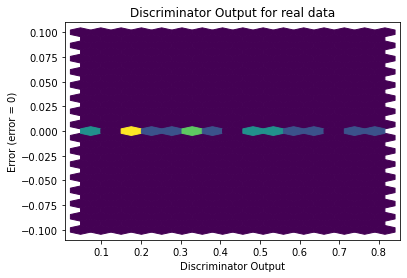

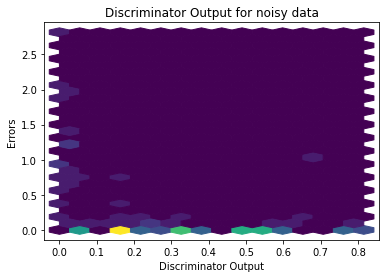

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
